<a href="https://www.kaggle.com/code/pratikguha/titanic-model?scriptVersionId=238118398" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv("/kaggle/input/titanic/train.csv")

In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df_train.duplicated().sum()

0

In [9]:
df_train.shape

(891, 12)

In [10]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [11]:
df_train.dropna().shape

(183, 12)

In [12]:
df_train.dropna(axis=1)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

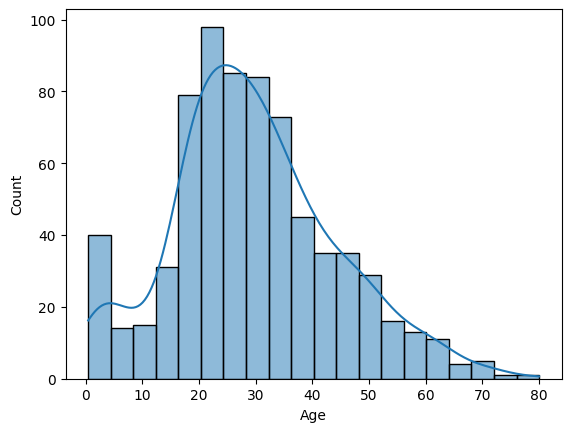

In [13]:
sns.histplot(df_train['Age'],kde=True)

In [14]:
df_train['Age_mean'] = df_train['Age'].fillna(df_train['Age'].mean())

In [15]:
df_train[['Age_mean','Age']]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Age_mean,Age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [16]:
df_train['Age_median'] = df_train['Age'].fillna(df_train['Age'].median())

In [17]:
df_train[['Age_median','Age_mean','Age']]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Age_median,Age_mean,Age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


In [18]:
df_train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0


In [19]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_mean         0
Age_median       0
dtype: int64

In [20]:
df_train[df_train['Cabin'].isnull()]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.000000,22.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.000000,26.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.000000,35.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,29.699118,28.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,2.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,25.000000,25.0
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,39.000000,39.0
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.000000,27.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,29.699118,28.0


In [21]:
df_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [22]:
mode_value= df_train [df_train['Cabin'].notna()]['Cabin'].mode()[0]

In [23]:
df_train['Cabin_mode'] = df_train['Cabin'].fillna(mode_value)

In [24]:
df_train[['Cabin_mode','Cabin']]

,Cabin_mode,Cabin
0,B96 B98,NaN
1,C85,C85
2,B96 B98,NaN
3,C123,C123
4,B96 B98,NaN
...,...,...
886,B96 B98,NaN
887,B42,B42
888,B96 B98,NaN
889,C148,C148


In [25]:
df_train['Cabin_mode'].isnull().sum()

0

In [26]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_mean         0
Age_median       0
Cabin_mode       0
dtype: int64

In [27]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median,Cabin_mode
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,38.0,38.0,B28
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,62.0,62.0,B28


In [28]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [29]:
mode_value_em= df_train [df_train['Embarked'].notna()]['Embarked'].mode()[0]

In [30]:
df_train['Embarked_mode'] = df_train['Embarked'].fillna(mode_value_em)

In [31]:
df_train.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
Age_mean           0
Age_median         0
Cabin_mode         0
Embarked_mode      0
dtype: int64

In [32]:
df_train.drop(columns=['Age','Cabin','Embarked','Age_mean'],inplace=True)

In [33]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Age_median       0
Cabin_mode       0
Embarked_mode    0
dtype: int64

In [34]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Age_median,Cabin_mode,Embarked_mode
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,22.0,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,38.0,C85,C


In [35]:
df_train['Title'] = df_train['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)

In [36]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Age_median,Cabin_mode,Embarked_mode,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,22.0,B96 B98,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,38.0,C85,C,Mrs


In [37]:
df_train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [38]:
df_train['Title'] = df_train['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})

In [39]:
df_train.drop(columns=['Name'],inplace=True)

In [40]:
df_train

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Age_median,Cabin_mode,Embarked_mode,Title
0,1,0,3,male,1,0,A/5 21171,7.2500,22.0,B96 B98,S,Mr
1,2,1,1,female,1,0,PC 17599,71.2833,38.0,C85,C,Mrs
2,3,1,3,female,0,0,STON/O2. 3101282,7.9250,26.0,B96 B98,S,Miss
3,4,1,1,female,1,0,113803,53.1000,35.0,C123,S,Mrs
4,5,0,3,male,0,0,373450,8.0500,35.0,B96 B98,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,211536,13.0000,27.0,B96 B98,S,Rev
887,888,1,1,female,0,0,112053,30.0000,19.0,B42,S,Miss
888,889,0,3,female,1,2,W./C. 6607,23.4500,28.0,B96 B98,S,Miss
889,890,1,1,male,0,0,111369,30.0000,26.0,C148,C,Mr


<Axes: >

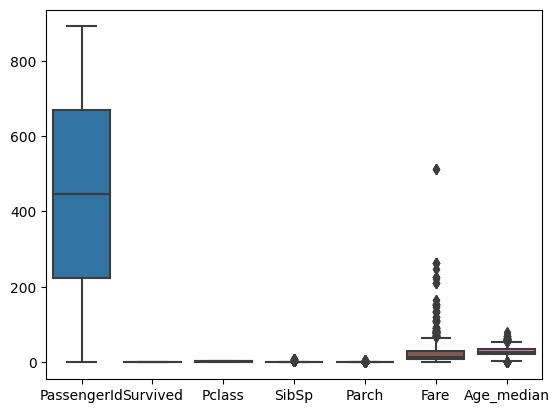

In [41]:
sns.boxplot(df_train)

In [42]:
Q1 = df_train['Fare'].quantile(0.25)
Q3 = df_train['Fare'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_train = df_train[(df_train['Fare'] >= lower_bound) & (df_train['Fare'] <= upper_bound)]

<Axes: >

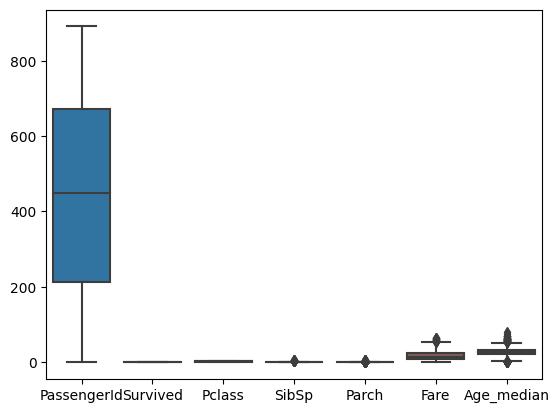

In [43]:
sns.boxplot(df_train)

In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    775 non-null    int64  
 1   Survived       775 non-null    int64  
 2   Pclass         775 non-null    int64  
 3   Sex            775 non-null    object 
 4   SibSp          775 non-null    int64  
 5   Parch          775 non-null    int64  
 6   Ticket         775 non-null    object 
 7   Fare           775 non-null    float64
 8   Age_median     775 non-null    float64
 9   Cabin_mode     775 non-null    object 
 10  Embarked_mode  775 non-null    object 
 11  Title          775 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 78.7+ KB


In [45]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Age_median,Cabin_mode,Embarked_mode,Title
0,1,0,3,male,1,0,A/5 21171,7.2500,22.0,B96 B98,S,Mr
2,3,1,3,female,0,0,STON/O2. 3101282,7.9250,26.0,B96 B98,S,Miss
3,4,1,1,female,1,0,113803,53.1000,35.0,C123,S,Mrs
4,5,0,3,male,0,0,373450,8.0500,35.0,B96 B98,S,Mr
5,6,0,3,male,0,0,330877,8.4583,28.0,B96 B98,Q,Mr


In [46]:
df_train

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Age_median,Cabin_mode,Embarked_mode,Title
0,1,0,3,male,1,0,A/5 21171,7.2500,22.0,B96 B98,S,Mr
2,3,1,3,female,0,0,STON/O2. 3101282,7.9250,26.0,B96 B98,S,Miss
3,4,1,1,female,1,0,113803,53.1000,35.0,C123,S,Mrs
4,5,0,3,male,0,0,373450,8.0500,35.0,B96 B98,S,Mr
5,6,0,3,male,0,0,330877,8.4583,28.0,B96 B98,Q,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,211536,13.0000,27.0,B96 B98,S,Rev
887,888,1,1,female,0,0,112053,30.0000,19.0,B42,S,Miss
888,889,0,3,female,1,2,W./C. 6607,23.4500,28.0,B96 B98,S,Miss
889,890,1,1,male,0,0,111369,30.0000,26.0,C148,C,Mr


In [47]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [48]:

pip install category_encoders


Note: you may need to restart the kernel to use updated packages.


In [49]:
df_train

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Age_median,Cabin_mode,Embarked_mode,Title
0,1,0,3,male,1,0,A/5 21171,7.2500,22.0,B96 B98,S,Mr
2,3,1,3,female,0,0,STON/O2. 3101282,7.9250,26.0,B96 B98,S,Miss
3,4,1,1,female,1,0,113803,53.1000,35.0,C123,S,Mrs
4,5,0,3,male,0,0,373450,8.0500,35.0,B96 B98,S,Mr
5,6,0,3,male,0,0,330877,8.4583,28.0,B96 B98,Q,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,211536,13.0000,27.0,B96 B98,S,Rev
887,888,1,1,female,0,0,112053,30.0000,19.0,B42,S,Miss
888,889,0,3,female,1,2,W./C. 6607,23.4500,28.0,B96 B98,S,Miss
889,890,1,1,male,0,0,111369,30.0000,26.0,C148,C,Mr


In [50]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['Sex'])

df_train = encoder.fit_transform(df_train)


In [51]:
df_train

,PassengerId,Survived,Pclass,Sex_0,Sex_1,SibSp,Parch,Ticket,Fare,Age_median,Cabin_mode,Embarked_mode,Title
0,1,0,3,0,1,1,0,A/5 21171,7.2500,22.0,B96 B98,S,Mr
2,3,1,3,1,0,0,0,STON/O2. 3101282,7.9250,26.0,B96 B98,S,Miss
3,4,1,1,1,0,1,0,113803,53.1000,35.0,C123,S,Mrs
4,5,0,3,0,1,0,0,373450,8.0500,35.0,B96 B98,S,Mr
5,6,0,3,0,1,0,0,330877,8.4583,28.0,B96 B98,Q,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,1,0,0,211536,13.0000,27.0,B96 B98,S,Rev
887,888,1,1,1,0,0,0,112053,30.0000,19.0,B42,S,Miss
888,889,0,3,1,0,1,2,W./C. 6607,23.4500,28.0,B96 B98,S,Miss
889,890,1,1,0,1,0,0,111369,30.0000,26.0,C148,C,Mr


In [52]:
df_train['Title'].unique()

array(['Mr', 'Miss', 'Mrs', 'Master', 'Don', 'Rev', 'Dr', 'Major', 'Lady',
       'Sir', 'Col', 'Jonkheer'], dtype=object)

In [53]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


In [54]:
df_train['Title'] = le.fit_transform(df_train['Title'])

In [55]:
df_train

,PassengerId,Survived,Pclass,Sex_0,Sex_1,SibSp,Parch,Ticket,Fare,Age_median,Cabin_mode,Embarked_mode,Title
0,1,0,3,0,1,1,0,A/5 21171,7.2500,22.0,B96 B98,S,8
2,3,1,3,1,0,0,0,STON/O2. 3101282,7.9250,26.0,B96 B98,S,7
3,4,1,1,1,0,1,0,113803,53.1000,35.0,C123,S,9
4,5,0,3,0,1,0,0,373450,8.0500,35.0,B96 B98,S,8
5,6,0,3,0,1,0,0,330877,8.4583,28.0,B96 B98,Q,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,1,0,0,211536,13.0000,27.0,B96 B98,S,10
887,888,1,1,1,0,0,0,112053,30.0000,19.0,B42,S,7
888,889,0,3,1,0,1,2,W./C. 6607,23.4500,28.0,B96 B98,S,7
889,890,1,1,0,1,0,0,111369,30.0000,26.0,C148,C,8


In [56]:
df_train['Cabin_mode'].unique()

array(['B96 B98', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'B30', 'C52',
       'F33', 'F G73', 'E31', 'A5', 'D10 D12', 'C110', 'E101', 'F E69',
       'D47', 'F2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4', 'A31',
       'D35', 'C87', 'B94', 'C118', 'A19', 'D', 'C106', 'E36', 'B18',
       'C124', 'T', 'C128', 'E50', 'E10', 'E44', 'C104', 'C111', 'E38',
       'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'E25', 'D46', 'B38',
       'B39', 'A16', 'C101', 'A10', 'A20', 'D19', 'D50', 'A23', 'B50',
       'A26', 'E58', 'C126', 'B71', 'B20', 'F G63', 'E24', 'C90', 'E8',
       'D45', 'D30', 'E121', 'E77', 'F38', 'D6', 'D17', 'A36', 'B102',
       'C47', 'D28', 'E17', 'A24', 'B51 B53 B55', 'B42', 'C148'],
      dtype=object)

In [57]:
df_train['Deck'] = df_train['Cabin_mode'].str[0]

In [58]:
df_train

,PassengerId,Survived,Pclass,Sex_0,Sex_1,SibSp,Parch,Ticket,Fare,Age_median,Cabin_mode,Embarked_mode,Title,Deck
0,1,0,3,0,1,1,0,A/5 21171,7.2500,22.0,B96 B98,S,8,B
2,3,1,3,1,0,0,0,STON/O2. 3101282,7.9250,26.0,B96 B98,S,7,B
3,4,1,1,1,0,1,0,113803,53.1000,35.0,C123,S,9,C
4,5,0,3,0,1,0,0,373450,8.0500,35.0,B96 B98,S,8,B
5,6,0,3,0,1,0,0,330877,8.4583,28.0,B96 B98,Q,8,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,1,0,0,211536,13.0000,27.0,B96 B98,S,10,B
887,888,1,1,1,0,0,0,112053,30.0000,19.0,B42,S,7,B
888,889,0,3,1,0,1,2,W./C. 6607,23.4500,28.0,B96 B98,S,7,B
889,890,1,1,0,1,0,0,111369,30.0000,26.0,C148,C,8,C


In [59]:
df_train['Deck'].unique()

array(['B', 'C', 'E', 'G', 'D', 'A', 'F', 'T'], dtype=object)

In [60]:
df_train['Deck'] = le.fit_transform(df_train['Deck'])

In [61]:
df_train

,PassengerId,Survived,Pclass,Sex_0,Sex_1,SibSp,Parch,Ticket,Fare,Age_median,Cabin_mode,Embarked_mode,Title,Deck
0,1,0,3,0,1,1,0,A/5 21171,7.2500,22.0,B96 B98,S,8,1
2,3,1,3,1,0,0,0,STON/O2. 3101282,7.9250,26.0,B96 B98,S,7,1
3,4,1,1,1,0,1,0,113803,53.1000,35.0,C123,S,9,2
4,5,0,3,0,1,0,0,373450,8.0500,35.0,B96 B98,S,8,1
5,6,0,3,0,1,0,0,330877,8.4583,28.0,B96 B98,Q,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,1,0,0,211536,13.0000,27.0,B96 B98,S,10,1
887,888,1,1,1,0,0,0,112053,30.0000,19.0,B42,S,7,1
888,889,0,3,1,0,1,2,W./C. 6607,23.4500,28.0,B96 B98,S,7,1
889,890,1,1,0,1,0,0,111369,30.0000,26.0,C148,C,8,2


In [62]:
df_train['Embarked_mode'].unique()

array(['S', 'Q', 'C'], dtype=object)

In [63]:
df_train['Embarked_mode'] = le.fit_transform(df_train['Embarked_mode'])

In [64]:
df_train

,PassengerId,Survived,Pclass,Sex_0,Sex_1,SibSp,Parch,Ticket,Fare,Age_median,Cabin_mode,Embarked_mode,Title,Deck
0,1,0,3,0,1,1,0,A/5 21171,7.2500,22.0,B96 B98,2,8,1
2,3,1,3,1,0,0,0,STON/O2. 3101282,7.9250,26.0,B96 B98,2,7,1
3,4,1,1,1,0,1,0,113803,53.1000,35.0,C123,2,9,2
4,5,0,3,0,1,0,0,373450,8.0500,35.0,B96 B98,2,8,1
5,6,0,3,0,1,0,0,330877,8.4583,28.0,B96 B98,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,1,0,0,211536,13.0000,27.0,B96 B98,2,10,1
887,888,1,1,1,0,0,0,112053,30.0000,19.0,B42,2,7,1
888,889,0,3,1,0,1,2,W./C. 6607,23.4500,28.0,B96 B98,2,7,1
889,890,1,1,0,1,0,0,111369,30.0000,26.0,C148,0,8,2


In [65]:
df_train=df_train.drop('Cabin_mode',axis=1)

In [66]:
df_train['Ticket'].unique()

array(['A/5 21171', 'STON/O2. 3101282', '113803', '373450', '330877',
       '17463', '349909', '347742', '237736', 'PP 9549', '113783',
       'A/5. 2151', '347082', '350406', '248706', '382652', '244373',
       '345763', '2649', '239865', '248698', '330923', '113788', '347077',
       '2631', '330959', '349216', 'PC 17601', '335677', 'C.A. 24579',
       '113789', '2677', 'A./5. 2152', '345764', '2651', '7546', '11668',
       '349253', 'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371',
       '14311', '2662', '349237', '3101295', 'A/4. 39886', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '347088', 'PC 17605', '2661', 'C.A. 29395', 'S.P. 3464',
       '3101281', '315151', 'C.A. 33111', '2680', '1601', '348123',
       '349208', '374746', '248738', '364516', '345767', '345779',
       '330932', '113059', 'SO/C 14885', '3101278', 'W./C. 6608',
       'SOTON/OQ 392086', '343275', '343276', '347466', 'W.E.P. 5734',
       'C.A. 231

In [67]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    775 non-null    int64  
 1   Survived       775 non-null    int64  
 2   Pclass         775 non-null    int64  
 3   Sex_0          775 non-null    int64  
 4   Sex_1          775 non-null    int64  
 5   SibSp          775 non-null    int64  
 6   Parch          775 non-null    int64  
 7   Ticket         775 non-null    object 
 8   Fare           775 non-null    float64
 9   Age_median     775 non-null    float64
 10  Embarked_mode  775 non-null    int64  
 11  Title          775 non-null    int64  
 12  Deck           775 non-null    int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 84.8+ KB


In [68]:
df_train

,PassengerId,Survived,Pclass,Sex_0,Sex_1,SibSp,Parch,Ticket,Fare,Age_median,Embarked_mode,Title,Deck
0,1,0,3,0,1,1,0,A/5 21171,7.2500,22.0,2,8,1
2,3,1,3,1,0,0,0,STON/O2. 3101282,7.9250,26.0,2,7,1
3,4,1,1,1,0,1,0,113803,53.1000,35.0,2,9,2
4,5,0,3,0,1,0,0,373450,8.0500,35.0,2,8,1
5,6,0,3,0,1,0,0,330877,8.4583,28.0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,1,0,0,211536,13.0000,27.0,2,10,1
887,888,1,1,1,0,0,0,112053,30.0000,19.0,2,7,1
888,889,0,3,1,0,1,2,W./C. 6607,23.4500,28.0,2,7,1
889,890,1,1,0,1,0,0,111369,30.0000,26.0,0,8,2


In [69]:
df_train['Ticket_Prefix'] = df_train['Ticket'].str.extract(r'([a-zA-Z]+)')
df_train['Ticket_Prefix'] = df_train['Ticket_Prefix'].fillna(value='No_Prefix')

In [70]:
df_train

,PassengerId,Survived,Pclass,Sex_0,Sex_1,SibSp,Parch,Ticket,Fare,Age_median,Embarked_mode,Title,Deck,Ticket_Prefix
0,1,0,3,0,1,1,0,A/5 21171,7.2500,22.0,2,8,1,A
2,3,1,3,1,0,0,0,STON/O2. 3101282,7.9250,26.0,2,7,1,STON
3,4,1,1,1,0,1,0,113803,53.1000,35.0,2,9,2,No_Prefix
4,5,0,3,0,1,0,0,373450,8.0500,35.0,2,8,1,No_Prefix
5,6,0,3,0,1,0,0,330877,8.4583,28.0,1,8,1,No_Prefix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,1,0,0,211536,13.0000,27.0,2,10,1,No_Prefix
887,888,1,1,1,0,0,0,112053,30.0000,19.0,2,7,1,No_Prefix
888,889,0,3,1,0,1,2,W./C. 6607,23.4500,28.0,2,7,1,W
889,890,1,1,0,1,0,0,111369,30.0000,26.0,0,8,2,No_Prefix


In [71]:
df_train['Ticket_Prefix'].value_counts()

Ticket_Prefix
No_Prefix    597
C             33
A             29
PC            22
STON          18
SOTON         17
SC            13
W             11
S              9
CA             7
F              6
LINE           4
PP             3
P              2
Fa             1
SW             1
SCO            1
SO             1
Name: count, dtype: int64

In [72]:
df_train['Ticket_Prefix'].unique()

array(['A', 'STON', 'No_Prefix', 'PP', 'PC', 'C', 'SC', 'S', 'CA', 'SO',
       'W', 'SOTON', 'Fa', 'LINE', 'F', 'SW', 'SCO', 'P'], dtype=object)

In [73]:
df_train['Ticket'] = le.fit_transform(df_train['Ticket_Prefix'])

In [74]:
df_train

,PassengerId,Survived,Pclass,Sex_0,Sex_1,SibSp,Parch,Ticket,Fare,Age_median,Embarked_mode,Title,Deck,Ticket_Prefix
0,1,0,3,0,1,1,0,0,7.2500,22.0,2,8,1,A
2,3,1,3,1,0,0,0,15,7.9250,26.0,2,7,1,STON
3,4,1,1,1,0,1,0,6,53.1000,35.0,2,9,2,No_Prefix
4,5,0,3,0,1,0,0,6,8.0500,35.0,2,8,1,No_Prefix
5,6,0,3,0,1,0,0,6,8.4583,28.0,1,8,1,No_Prefix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,1,0,0,6,13.0000,27.0,2,10,1,No_Prefix
887,888,1,1,1,0,0,0,6,30.0000,19.0,2,7,1,No_Prefix
888,889,0,3,1,0,1,2,17,23.4500,28.0,2,7,1,W
889,890,1,1,0,1,0,0,6,30.0000,26.0,0,8,2,No_Prefix


In [75]:
df_train=df_train.drop('Ticket_Prefix',axis=1)

In [76]:
df_train

,PassengerId,Survived,Pclass,Sex_0,Sex_1,SibSp,Parch,Ticket,Fare,Age_median,Embarked_mode,Title,Deck
0,1,0,3,0,1,1,0,0,7.2500,22.0,2,8,1
2,3,1,3,1,0,0,0,15,7.9250,26.0,2,7,1
3,4,1,1,1,0,1,0,6,53.1000,35.0,2,9,2
4,5,0,3,0,1,0,0,6,8.0500,35.0,2,8,1
5,6,0,3,0,1,0,0,6,8.4583,28.0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,1,0,0,6,13.0000,27.0,2,10,1
887,888,1,1,1,0,0,0,6,30.0000,19.0,2,7,1
888,889,0,3,1,0,1,2,17,23.4500,28.0,2,7,1
889,890,1,1,0,1,0,0,6,30.0000,26.0,0,8,2


In [77]:
df_train

,PassengerId,Survived,Pclass,Sex_0,Sex_1,SibSp,Parch,Ticket,Fare,Age_median,Embarked_mode,Title,Deck
0,1,0,3,0,1,1,0,0,7.2500,22.0,2,8,1
2,3,1,3,1,0,0,0,15,7.9250,26.0,2,7,1
3,4,1,1,1,0,1,0,6,53.1000,35.0,2,9,2
4,5,0,3,0,1,0,0,6,8.0500,35.0,2,8,1
5,6,0,3,0,1,0,0,6,8.4583,28.0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,1,0,0,6,13.0000,27.0,2,10,1
887,888,1,1,1,0,0,0,6,30.0000,19.0,2,7,1
888,889,0,3,1,0,1,2,17,23.4500,28.0,2,7,1
889,890,1,1,0,1,0,0,6,30.0000,26.0,0,8,2


In [78]:
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")

In [79]:
df_test

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [80]:
df_gender = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [81]:
df_gender

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [82]:
df_train

,PassengerId,Survived,Pclass,Sex_0,Sex_1,SibSp,Parch,Ticket,Fare,Age_median,Embarked_mode,Title,Deck
0,1,0,3,0,1,1,0,0,7.2500,22.0,2,8,1
2,3,1,3,1,0,0,0,15,7.9250,26.0,2,7,1
3,4,1,1,1,0,1,0,6,53.1000,35.0,2,9,2
4,5,0,3,0,1,0,0,6,8.0500,35.0,2,8,1
5,6,0,3,0,1,0,0,6,8.4583,28.0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,1,0,0,6,13.0000,27.0,2,10,1
887,888,1,1,1,0,0,0,6,30.0000,19.0,2,7,1
888,889,0,3,1,0,1,2,17,23.4500,28.0,2,7,1
889,890,1,1,0,1,0,0,6,30.0000,26.0,0,8,2


In [83]:
df_test

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [84]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [85]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [86]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [87]:
df_test.duplicated().sum()

0

In [88]:
df_test.shape

(418, 11)

In [89]:
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())

In [90]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S


In [91]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [92]:
mode_value= df_test [df_test['Cabin'].notna()]['Cabin'].mode()[0]

In [93]:
df_test['Cabin'] = df_test['Cabin'].fillna(mode_value)

In [94]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,B57 B59 B63 B66,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,B57 B59 B63 B66,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,B57 B59 B63 B66,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,B57 B59 B63 B66,S


In [95]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [96]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,B57 B59 B63 B66,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,B57 B59 B63 B66,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,B57 B59 B63 B66,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,B57 B59 B63 B66,S


In [97]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [98]:
df_test["Fare"].fillna(df_test["Fare"].mode()[0],inplace=True)


/tmp/ipykernel_13/932234183.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test["Fare"].fillna(df_test["Fare"].mode()[0],inplace=True)


In [99]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [100]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,B57 B59 B63 B66,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,B57 B59 B63 B66,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,B57 B59 B63 B66,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,B57 B59 B63 B66,S


In [101]:
df_test['Title'] = df_test['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)

In [102]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,B57 B59 B63 B66,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,B57 B59 B63 B66,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,B57 B59 B63 B66,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,B57 B59 B63 B66,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,B57 B59 B63 B66,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C,Dona
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S,Mr
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,B57 B59 B63 B66,S,Mr


In [103]:
df_test['Title'] = df_test['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})

In [104]:
df_test.drop(columns='Name',inplace=True)

In [105]:
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.50000,0,0,330911,7.8292,B57 B59 B63 B66,Q,Mr
1,893,3,female,47.00000,1,0,363272,7.0000,B57 B59 B63 B66,S,Mrs
2,894,2,male,62.00000,0,0,240276,9.6875,B57 B59 B63 B66,Q,Mr
3,895,3,male,27.00000,0,0,315154,8.6625,B57 B59 B63 B66,S,Mr
4,896,3,female,22.00000,1,1,3101298,12.2875,B57 B59 B63 B66,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,30.27259,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S,Mr
414,1306,1,female,39.00000,0,0,PC 17758,108.9000,C105,C,Dona
415,1307,3,male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S,Mr
416,1308,3,male,30.27259,0,0,359309,8.0500,B57 B59 B63 B66,S,Mr


In [106]:
df_test = encoder.fit_transform(df_test)


In [107]:
df_test

,PassengerId,Pclass,Sex_0,Sex_1,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,1,34.50000,0,0,330911,7.8292,B57 B59 B63 B66,Q,Mr
1,893,3,1,0,47.00000,1,0,363272,7.0000,B57 B59 B63 B66,S,Mrs
2,894,2,0,1,62.00000,0,0,240276,9.6875,B57 B59 B63 B66,Q,Mr
3,895,3,0,1,27.00000,0,0,315154,8.6625,B57 B59 B63 B66,S,Mr
4,896,3,1,0,22.00000,1,1,3101298,12.2875,B57 B59 B63 B66,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,1,30.27259,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S,Mr
414,1306,1,1,0,39.00000,0,0,PC 17758,108.9000,C105,C,Dona
415,1307,3,0,1,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S,Mr
416,1308,3,0,1,30.27259,0,0,359309,8.0500,B57 B59 B63 B66,S,Mr


In [108]:
df_test['Title'] = le.fit_transform(df_test['Title'])

In [109]:
df_test.head()

,PassengerId,Pclass,Sex_0,Sex_1,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,1,34.5,0,0,330911,7.8292,B57 B59 B63 B66,Q,5
1,893,3,1,0,47.0,1,0,363272,7.0000,B57 B59 B63 B66,S,6
2,894,2,0,1,62.0,0,0,240276,9.6875,B57 B59 B63 B66,Q,5
3,895,3,0,1,27.0,0,0,315154,8.6625,B57 B59 B63 B66,S,5
4,896,3,1,0,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,S,6


In [110]:
df_test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [111]:
df_test['Embarked'] = le.fit_transform(df_test['Embarked'])

In [112]:
df_test

,PassengerId,Pclass,Sex_0,Sex_1,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,1,34.50000,0,0,330911,7.8292,B57 B59 B63 B66,1,5
1,893,3,1,0,47.00000,1,0,363272,7.0000,B57 B59 B63 B66,2,6
2,894,2,0,1,62.00000,0,0,240276,9.6875,B57 B59 B63 B66,1,5
3,895,3,0,1,27.00000,0,0,315154,8.6625,B57 B59 B63 B66,2,5
4,896,3,1,0,22.00000,1,1,3101298,12.2875,B57 B59 B63 B66,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,1,30.27259,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,2,5
414,1306,1,1,0,39.00000,0,0,PC 17758,108.9000,C105,0,1
415,1307,3,0,1,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,2,5
416,1308,3,0,1,30.27259,0,0,359309,8.0500,B57 B59 B63 B66,2,5


In [113]:
df_test['Ticket_Prefix'] = df_test['Ticket'].str.extract(r'([a-zA-Z]+)')
df_test['Ticket_Prefix'] = df_test['Ticket_Prefix'].fillna(value='No_Prefix')

In [114]:
df_test['Ticket'] = le.fit_transform(df_test['Ticket_Prefix'])

In [115]:
df_test

,PassengerId,Pclass,Sex_0,Sex_1,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Ticket_Prefix
0,892,3,0,1,34.50000,0,0,6,7.8292,B57 B59 B63 B66,1,5,No_Prefix
1,893,3,1,0,47.00000,1,0,6,7.0000,B57 B59 B63 B66,2,6,No_Prefix
2,894,2,0,1,62.00000,0,0,6,9.6875,B57 B59 B63 B66,1,5,No_Prefix
3,895,3,0,1,27.00000,0,0,6,8.6625,B57 B59 B63 B66,2,5,No_Prefix
4,896,3,1,0,22.00000,1,1,6,12.2875,B57 B59 B63 B66,2,6,No_Prefix
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,1,30.27259,0,0,0,8.0500,B57 B59 B63 B66,2,5,A
414,1306,1,1,0,39.00000,0,0,7,108.9000,C105,0,1,PC
415,1307,3,0,1,38.50000,0,0,11,7.2500,B57 B59 B63 B66,2,5,SOTON
416,1308,3,0,1,30.27259,0,0,6,8.0500,B57 B59 B63 B66,2,5,No_Prefix


In [116]:
df_test.drop(columns='Ticket_Prefix',inplace=True)

In [117]:
df_test

,PassengerId,Pclass,Sex_0,Sex_1,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,1,34.50000,0,0,6,7.8292,B57 B59 B63 B66,1,5
1,893,3,1,0,47.00000,1,0,6,7.0000,B57 B59 B63 B66,2,6
2,894,2,0,1,62.00000,0,0,6,9.6875,B57 B59 B63 B66,1,5
3,895,3,0,1,27.00000,0,0,6,8.6625,B57 B59 B63 B66,2,5
4,896,3,1,0,22.00000,1,1,6,12.2875,B57 B59 B63 B66,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,1,30.27259,0,0,0,8.0500,B57 B59 B63 B66,2,5
414,1306,1,1,0,39.00000,0,0,7,108.9000,C105,0,1
415,1307,3,0,1,38.50000,0,0,11,7.2500,B57 B59 B63 B66,2,5
416,1308,3,0,1,30.27259,0,0,6,8.0500,B57 B59 B63 B66,2,5


In [118]:
df_test['Cabin'].unique()

array(['B57 B59 B63 B66', 'B45', 'E31', 'B36', 'A21', 'C78', 'D34', 'D19',
       'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53', 'D43',
       'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116', 'F',
       'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22', 'B10',
       'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64', 'A11',
       'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89', 'F E46',
       'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78', 'F E57', 'F2',
       'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60', 'E50', 'E39 E41',
       'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7', 'D40', 'D38',
       'C105'], dtype=object)

In [119]:
df_test['Deck'] = df_test['Cabin'].str[0]

In [120]:
df_test

,PassengerId,Pclass,Sex_0,Sex_1,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck
0,892,3,0,1,34.50000,0,0,6,7.8292,B57 B59 B63 B66,1,5,B
1,893,3,1,0,47.00000,1,0,6,7.0000,B57 B59 B63 B66,2,6,B
2,894,2,0,1,62.00000,0,0,6,9.6875,B57 B59 B63 B66,1,5,B
3,895,3,0,1,27.00000,0,0,6,8.6625,B57 B59 B63 B66,2,5,B
4,896,3,1,0,22.00000,1,1,6,12.2875,B57 B59 B63 B66,2,6,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,1,30.27259,0,0,0,8.0500,B57 B59 B63 B66,2,5,B
414,1306,1,1,0,39.00000,0,0,7,108.9000,C105,0,1,C
415,1307,3,0,1,38.50000,0,0,11,7.2500,B57 B59 B63 B66,2,5,B
416,1308,3,0,1,30.27259,0,0,6,8.0500,B57 B59 B63 B66,2,5,B


In [121]:
df_test['Deck'].unique()

array(['B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [122]:
df_test['Deck'] = le.fit_transform(df_test['Deck'])

In [123]:
df_test

,PassengerId,Pclass,Sex_0,Sex_1,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck
0,892,3,0,1,34.50000,0,0,6,7.8292,B57 B59 B63 B66,1,5,1
1,893,3,1,0,47.00000,1,0,6,7.0000,B57 B59 B63 B66,2,6,1
2,894,2,0,1,62.00000,0,0,6,9.6875,B57 B59 B63 B66,1,5,1
3,895,3,0,1,27.00000,0,0,6,8.6625,B57 B59 B63 B66,2,5,1
4,896,3,1,0,22.00000,1,1,6,12.2875,B57 B59 B63 B66,2,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,1,30.27259,0,0,0,8.0500,B57 B59 B63 B66,2,5,1
414,1306,1,1,0,39.00000,0,0,7,108.9000,C105,0,1,2
415,1307,3,0,1,38.50000,0,0,11,7.2500,B57 B59 B63 B66,2,5,1
416,1308,3,0,1,30.27259,0,0,6,8.0500,B57 B59 B63 B66,2,5,1


In [124]:
df_test.drop(columns='Cabin',inplace=True)

In [125]:
df_test

,PassengerId,Pclass,Sex_0,Sex_1,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck
0,892,3,0,1,34.50000,0,0,6,7.8292,1,5,1
1,893,3,1,0,47.00000,1,0,6,7.0000,2,6,1
2,894,2,0,1,62.00000,0,0,6,9.6875,1,5,1
3,895,3,0,1,27.00000,0,0,6,8.6625,2,5,1
4,896,3,1,0,22.00000,1,1,6,12.2875,2,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,1,30.27259,0,0,0,8.0500,2,5,1
414,1306,1,1,0,39.00000,0,0,7,108.9000,0,1,2
415,1307,3,0,1,38.50000,0,0,11,7.2500,2,5,1
416,1308,3,0,1,30.27259,0,0,6,8.0500,2,5,1
